In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
despesas = pd.read_csv('despesas-prefeitura.csv')
despesas.head()

,data_publicacao,fase,credor,valor,numero,cpf_ou_cnpj,data_pagamento,numero_processo,bem_ou_servico_prestado,natureza,acao,funcao,subfuncao,processo_licitatorio,fonte_recurso
0,01/01/2010,EMPENHO,METALPIRES INDUSTRIA E COM LT,"R$ 203.690,00",10000348,06.965.538/0001-00,01/01/2010,157/2009,REF AQUISICAO DE MOBILIARIOS E EQUIPAMENTOS PA...,449052090000 - Out.Equip. e Mat. Permanente,2040 - Equipar e Reequipar Unidades Escolares ...,12 - EDUCACAO,361 - ENSINO FUNDAMENTAL,PREGAO,0001 - REC.IMP.TRANSF.EDUCACAO 25%
1,01/01/2010,EMPENHO,INST.NAC.DE SEGURIDADE SOCIAL,"R$ 1.500.000,00",10000195,01.404.357/0001-51,01/01/2010,NaN,REFERENTE A DESPESA COM PARCE- LAMENTO DA DI...,469071030000 - INSS/PARCELAMENTO,2145 - Administracao de encagos especiais,28 - ENCARGOS ESPECIAIS,843 - SERVICO DA DIVIDA INTERNA,ISENTO,0000 - RECURSOS ORDINARIOS
2,01/01/2010,EMPENHO,GASAUTO LOCAC?O DE VEICULOS L,"R$ 18.816,00",113/2009,00.426.288/0001-58,01/01/2010,039/2009,locac?o de 04 motocicletas 150cc com com parti...,339039780000 - locacao de veiculos,2141 - Seguranca no transito,26 - TRANSPORTE,452 - SERVICOS URBANOS,CONVITE,0050 - REC.PROPRIAS ENT.ADM.
3,02/01/2010,EMPENHO,SALUSTIANO JOSE ALVES DIAS,"R$ 4.800,00",10000024,407.981.865-34,02/01/2010,230/2007,"TERMO DE RENOVACAO DO ADITIVO 5025271/2009, R...",339039780000 - locacao de veiculos,2097 - Pavimentacao e infra-estrutura,15 - URBANISMO,451 - INFRA-ESTRUTURA URBANA,TOMADA DE PRECO,0000 - RECURSOS ORDINARIOS
4,02/01/2010,EMPENHO,VALDEANE DOS SANTOS DIAS,"R$ 3.600,00",10000494,006.534.185-66,02/01/2010,NaN,REF. ALUGUEL DO IMOVEL ONDE FUNCIONA O NUCL...,339039100000 - Locacao de imoveis,2084 - Programa Errad.Trabalho Infantil PETI,08 - ASSISTENCIA SOCIAL,243 - ASSISTENCIA A CRIANCA E AO ADO,ISENTO,0000 - RECURSOS ORDINARIOS


In [4]:
despesas["data_pagamento"] = pd.to_datetime(despesas["data_pagamento"])
despesas = despesas[despesas["data_pagamento"].isin(pd.date_range("2019-01-01", "2019-12-31"))]

despesas = despesas.sort_values('data_pagamento', ascending=False)
despesas.head()

,data_publicacao,fase,credor,valor,numero,cpf_ou_cnpj,data_pagamento,numero_processo,bem_ou_servico_prestado,natureza,acao,funcao,subfuncao,processo_licitatorio,fonte_recurso
427308,12/11/2019,PAGAMENTO,LOCADORA VIVA LTDA,"R$ 15.924,14",13106-19,09.440.071/0001-80,2019-12-11,264-2018,REFERENTE A DESPESA COM LOCAÇÃO DE VEÍCULO. PE...,339039020000 - Locaçao de Veículos,2122 - Recolhimento e tratamento do lixo,15 - URBANISMO,452 - SERVICOS URBANOS,PREGAO,0000 - RECURSOS ORDINARIOS
427352,12/11/2019,PAGAMENTO,IPSI-INSTITUTO DE PREVIDENCIA DOS SERVIDORES D...,"R$ 215,25",13071-19,02.561.555/0001-38,2019-12-11,NaN,REFERENTE A DESPESA COM OBRIGAÇÕES PATRONAIS.,319013090000 - Outgros ENcargos Patronais,2036 - Manutencao e Desenvolvimento Ensino Fun...,12 - EDUCACAO,361 - ENSINO FUNDAMENTAL,ISENTO,0018 - TRANSF. FUNDEB PESSOAL
427341,12/11/2019,PAGAMENTO,ELINALDO DOREA MAIA ME,"R$ 14.324,00",13163-19,04.107.327/0001-18,2019-12-11,094-2019,REFERENTE A DESPESA COM AQUISIÇÃO DE MATERIAL ...,339030060000 - Material P/manuntençao de Veiculos,2037 - Manutencao desenv. da educacao infantil,12 - EDUCACAO,365 - EDUCACAO INFANTIL,PREGAO,0001 - REC.IMP.TRANSF.EDUCACAO 25%
427342,12/11/2019,PAGAMENTO,SEM EXCEÇÃO COMERCIO DE INFORMATICA E SERVIcOS...,"R$ 8.138,55",13164-19,11.459.623/0001-43,2019-12-11,NaN,REFERENTE A DESPESA COM SERVIÇO DE RECARGA DE ...,339039999900 - Outros Serv.Terceiros - P. Juri...,2037 - Manutencao desenv. da educacao infantil,12 - EDUCACAO,365 - EDUCACAO INFANTIL,ISENTO,0001 - REC.IMP.TRANSF.EDUCACAO 25%
427343,12/11/2019,PAGAMENTO,EMBASA EMP BAIANA DE A E SANEA,"R$ 95,10",13213-19,13.504.675/0001-10,2019-12-11,NaN,REFERENTE A DESPESA COM CONSUMO DE ÁGUA. PERÍO...,339039110000 - Serviços de Fornecimnto de Agua,"2032 - Manutencao, Org. e Modernizaçao da Secr...",12 - EDUCACAO,122 - ADMINISTRACAO GERAL,ISENTO,0001 - REC.IMP.TRANSF.EDUCACAO 25%


In [5]:
despesas.shape

(26242, 15)

In [6]:
despesas["natureza"].unique()

array(['339039020000 - Locaçao de Veículos',
       '319013090000 - Outgros ENcargos Patronais',
       '339030060000 - Material P/manuntençao de Veiculos',
       '339039999900 - Outros Serv.Terceiros - P. Juridica',
       '339039110000 - Serviços de Fornecimnto de Agua',
       '339039190000 - Locação, Confecção e Montagem de Cen',
       '449051010000 - Obras e Instalacoes (mao de obra)',
       '339040000000 - Servicos de Tecnlogia da Informacao',
       '449052069900 - Equip. masterial Perm. Diversos',
       '339039010000 - Publicidades e Propaganda',
       '339030020000 - Combustíveis e Lubrificantes',
       '339039200000 - Locação de Banheiros Químicos',
       '339034019900 - Out.Serv.de Tercerizaçao-P.Jurídica',
       '339039030000 - Locaçao de Imóvel',
       '339039999600 - Manutenção e conservação de máquinas',
       '339030999900 - Materiais de Consumo - Outros',
       '449052040000 - Bens Moveis- Moveis e Utensilios',
       '339030010000 - Suprimentos de Informáti

In [7]:
classificacao = pd.read_csv(
    'classificacao-da-despesa-orcamentaria-por-natureza-2020.csv',
    dtype={'CO': str, 'GD': str, 'MA': str, 'ED': str, 'SED': str}
)
classificacao

,CO,GD,MA,ED,SED,Código,Código sem máscara,Descrição,Tipo
0,3,0,00,00,00,3.0.00.00.00,30000000,Despesas Correntes,Sintética
1,3,1,00,00,00,3.1.00.00.00,31000000,Pessoal e Encargos Sociais,Sintética
2,3,1,71,00,00,3.1.71.00.00,31710000,Transferências a Consórcios Públicos Mediante ...,Sintética
3,3,1,71,70,00,3.1.71.70.00,31717000,Rateio pela Participação em Consórcio Público,Analítica
4,3,1,71,99,00,3.1.71.99.00,31719900,A Classificar,Analítica
...,...,...,...,...,...,...,...,...,...
1973,4,6,99,99,00,4.6.99.99.00,46999900,A Classificar,Analítica
1974,9,9,00,00,00,9.9.00.00.00,99000000,Reserva de Contingência ou Reserva do RPPS,Sintética
1975,9,9,99,00,00,9.9.99.00.00,99990000,Reserva de Contingência ou Reserva do RPPS,Sintética
1976,9,9,99,99,99,9.9.99.99.00,99999900,Reserva de Contingência ou Reserva do RPPS,Sintética


In [8]:
def normalize_currency(value):
    """Converte de R$ 69.848,70 (str) para 69848.70 (float)."""
    try:
        cleaned_value = value.replace("R$", "").replace(".", "").replace(",", ".")
        return float(cleaned_value)
    except ValueError:
        return


despesas["valor"] = despesas["valor"].apply(normalize_currency)

In [9]:
despesas['subgroup'] = despesas['natureza'].str.extract('\d+ - (.*)')
despesas['subgroup']

427308                    Locaçao de Veículos
427352             Outgros ENcargos Patronais
427341     Material P/manuntençao de Veiculos
427342    Outros Serv.Terceiros - P. Juridica
427343        Serviços de Fornecimnto de Agua
                         ...                 
403373              Publicidades e Propaganda
403374           Gênero Alimentícios - Outros
403375              Publicidades e Propaganda
403376      Obras e Instalacoes (mao de obra)
403344                    Locaçao de Veículos
Name: subgroup, Length: 26242, dtype: object

In [10]:
despesas['classificacao'] = despesas['natureza'].str.extract('(\d{8})')

despesas_com_classificacao = despesas.merge(classificacao, left_on=['classificacao'], right_on=['Código sem máscara'], how='left')
despesas_com_classificacao

,data_publicacao,fase,credor,valor,numero,cpf_ou_cnpj,data_pagamento,numero_processo,bem_ou_servico_prestado,natureza,...,classificacao,CO,GD,MA,ED,SED,Código,Código sem máscara,Descrição,Tipo
0,12/11/2019,PAGAMENTO,LOCADORA VIVA LTDA,15924.14,13106-19,09.440.071/0001-80,2019-12-11,264-2018,REFERENTE A DESPESA COM LOCAÇÃO DE VEÍCULO. PE...,339039020000 - Locaçao de Veículos,...,33903902,3,3,90,39,02,3.3.90.39.02,33903902,Condomínios,Analítica
1,12/11/2019,PAGAMENTO,IPSI-INSTITUTO DE PREVIDENCIA DOS SERVIDORES D...,215.25,13071-19,02.561.555/0001-38,2019-12-11,NaN,REFERENTE A DESPESA COM OBRIGAÇÕES PATRONAIS.,319013090000 - Outgros ENcargos Patronais,...,31901309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12/11/2019,PAGAMENTO,ELINALDO DOREA MAIA ME,14324.00,13163-19,04.107.327/0001-18,2019-12-11,094-2019,REFERENTE A DESPESA COM AQUISIÇÃO DE MATERIAL ...,339030060000 - Material P/manuntençao de Veiculos,...,33903006,3,3,90,30,06,3.3.90.30.06,33903006,Alimentos para Animais,Analítica
3,12/11/2019,PAGAMENTO,SEM EXCEÇÃO COMERCIO DE INFORMATICA E SERVIcOS...,8138.55,13164-19,11.459.623/0001-43,2019-12-11,NaN,REFERENTE A DESPESA COM SERVIÇO DE RECARGA DE ...,339039999900 - Outros Serv.Terceiros - P. Juri...,...,33903999,3,3,90,39,99,3.3.90.39.99,33903999,Outros Serviços de Terceiros – Pessoa Jurídica,Analítica
4,12/11/2019,PAGAMENTO,EMBASA EMP BAIANA DE A E SANEA,95.10,13213-19,13.504.675/0001-10,2019-12-11,NaN,REFERENTE A DESPESA COM CONSUMO DE ÁGUA. PERÍO...,339039110000 - Serviços de Fornecimnto de Agua,...,33903911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26237,01/02/2019,LIQUIDAÇÃO,CIDADE PROP. E MARKENTING LTDA,26250.00,18000088/0001,06.955.452/0001-03,2019-01-02,NaN,REF. DESPESAS COM PUBLICIDADE E PROPAGANDA.,339039010000 - Publicidades e Propaganda,...,33903901,3,3,90,39,01,3.3.90.39.01,33903901,Assinaturas de Periódicos e Anuidades,Analítica
26238,01/02/2019,PAGAMENTO,CUBO ICE DISTRIBUIDORA LTDA ME,2830.00,00514-19,10.816.212/0001-03,2019-01-02,NaN,REF. DESPESAS COM AQUISIÇÃO DE GENEROS ALIMENT...,339030120000 - Gênero Alimentícios - Outros,...,33903012,3,3,90,30,12,3.3.90.30.12,33903012,Material de Coudelaria ou de Uso Zootécnico,Analítica
26239,01/02/2019,PAGAMENTO,MERCADO DE PRO.E MARK. LTDA,24971.10,00513-19,02.620.895/0001-92,2019-01-02,NaN,REF DESPESA COM SERVICO DE PUBLICIDADE DA PMFS,339039010000 - Publicidades e Propaganda,...,33903901,3,3,90,39,01,3.3.90.39.01,33903901,Assinaturas de Periódicos e Anuidades,Analítica
26240,01/02/2019,PAGAMENTO,SOLIDEZ ENGENHARIA E CONSTRUCOES EIRELI - EPP,51964.11,00512-19,22.942.755/0001-48,2019-01-02,NaN,NaN,449051010000 - Obras e Instalacoes (mao de obra),...,44905101,4,4,90,51,01,4.4.90.51.01,44905101,Obras e Instalações de Domínio Público,Analítica


In [11]:
despesas.shape, despesas_com_classificacao.shape

((26242, 17), (26242, 26))

count    2.622500e+04
mean     4.252340e+04
std      2.764347e+05
min     -2.200000e+06
25%      9.980000e+02
50%      3.562500e+03
75%      1.635821e+04
max      9.200000e+06
Name: valor, dtype: float64


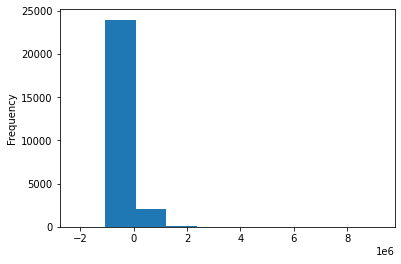

In [12]:
print(despesas["valor"].describe())

despesas["valor"].plot(kind="hist")

In [13]:
import seaborn as sns
sns.set_style("whitegrid")

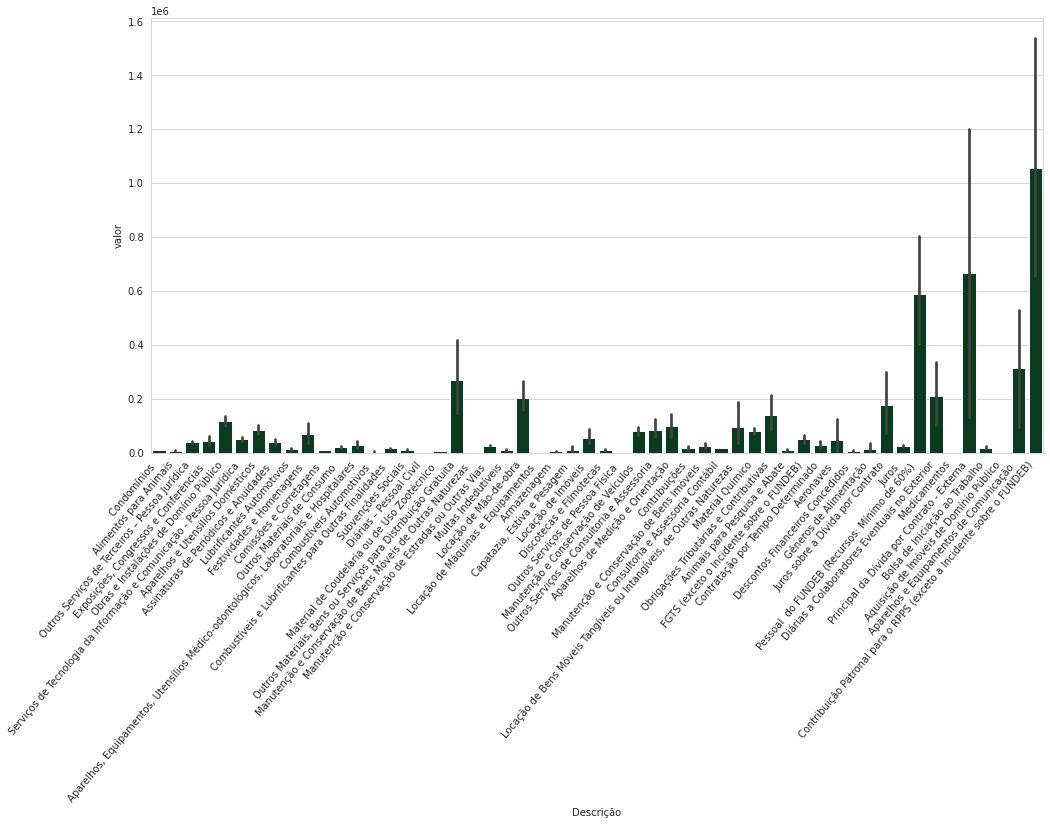

In [14]:
plt.figure(figsize=(16,8))
plot = sns.barplot(
        x=despesas_com_classificacao['Descrição'],
            y=despesas_com_classificacao.valor,
            palette=sns.color_palette("BuGn_r", n_colors=len(despesas_com_classificacao) + 4))
plot.set_xticklabels(plot.get_xticklabels(), rotation=50, horizontalalignment='right')
plt.show()

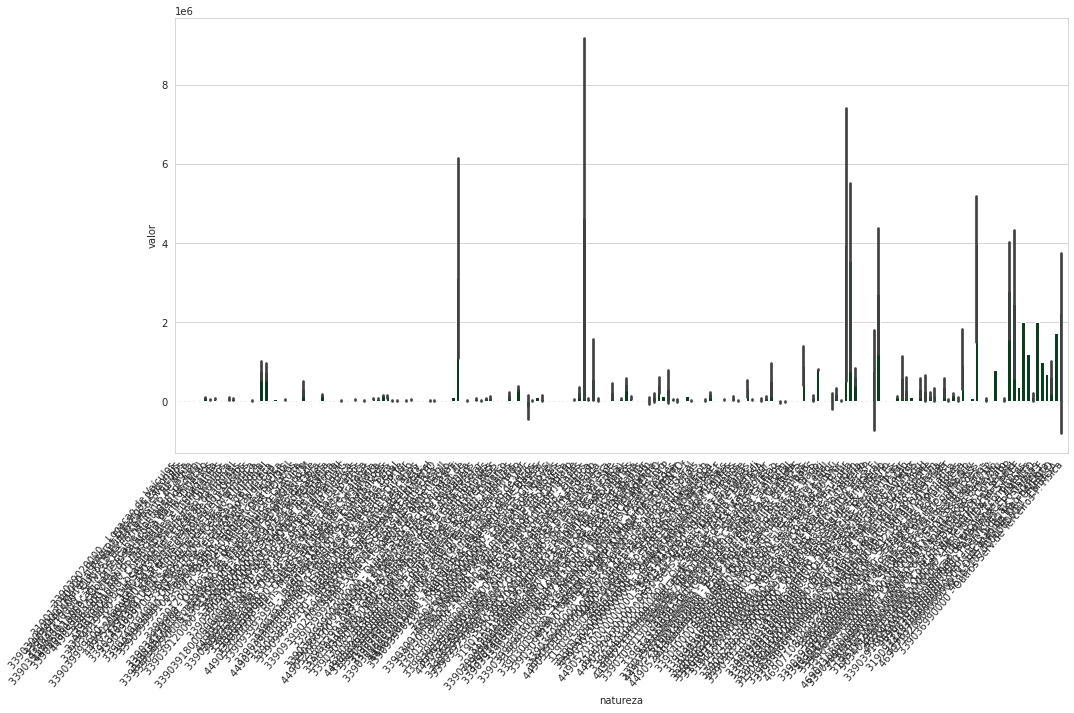

In [15]:
plt.figure(figsize=(16,8))
plot = sns.barplot(
        x=despesas_com_classificacao['natureza'],
            y=despesas_com_classificacao.valor,
            palette=sns.color_palette("BuGn_r", n_colors=len(despesas_com_classificacao) + 4))
plot.set_xticklabels(plot.get_xticklabels(), rotation=50, horizontalalignment='right')
plt.show()

In [23]:
despesas_com_classificacao.groupby(
    ['subgroup']
).size().reset_index().rename(columns={0: 'count'}).sort_values('subgroup', ascending=True)

,subgroup,count
0,Aparelhos e equipamentos de comunica,2
1,Aparelhos e utensilios domésticos,1
2,Aquisiçao de Vale-Transporte,280
3,Bens Moveis- Moveis e Utensili,11
4,Bens Moveis- Moveis e Utensilios,28
5,Bens Moveis- Veiculos e Embarc,3
6,Bens Moveis- Veiculos e Embarcaçoes,4
7,Bens Moveis-Maquinas e Tratore,4
8,CAIXA CONT Nº 0412189-88/2012,1
9,CAIXA CONT Nº 0412189-88/2012 - BRT,8


In [16]:
pd.set_option('display.max_rows', 500)
# 'natureza': 339030110000 x 339030110000000000
despesas_com_classificacao.groupby(
    ['subgroup', 'Descrição', 'Código']
).size().reset_index().rename(columns={0: 'count'}).sort_values('Descrição', ascending=True)

,subgroup,Descrição,Código,count
30,Gênero Alimentícios-Merenda Es,Material Químico,3.3.90.30.11,7
31,Gênero Alimentícios-Merenda Escolar,Material Químico,3.3.90.30.11,158
29,Gênero Alimentícios - Outros,Material de Coudelaria ou de Uso Zootécnico,3.3.90.30.12,368
51,Material P/Manunt. Máquinas e Embar,Medicamentos,3.3.90.30.09,2
61,Obras e Instalacoes (mao de obra),Obras e Instalações de Domínio Público,4.4.90.51.01,503
60,Obras e Instalacoes (mao de ob,Obras e Instalações de Domínio Público,4.4.90.51.01,115
22,Equi.de Processamentos de Dado,Aeronaves,4.4.90.52.01,1
23,Equi.de Processamentos de Dados,Aeronaves,4.4.90.52.01,6
57,Material P/manuntençao de Veiculos,Alimentos para Animais,3.3.90.30.06,502
56,Material P/manuntençao de Veic,Alimentos para Animais,3.3.90.30.06,82


In [22]:
animais = despesas_com_classificacao[despesas_com_classificacao['Descrição']==' Medicamentos']
animais[['natureza', 'subgroup', 'Descrição', 'bem_ou_servico_prestado', 'Código', 'valor', 'credor', 'cpf_ou_cnpj']]

,natureza,subgroup,Descrição,bem_ou_servico_prestado,Código,valor,credor,cpf_ou_cnpj
5007,339030090000 - Material P/Manunt. Máquinas e E...,Material P/Manunt. Máquinas e Embar,Medicamentos,REF. AQUISIÇÃO DE PEÇAS PARA TRATOR AGRICOLA,3.3.90.30.09,2678.0,GNL TRATORES IMPLEMENTOS E PEÇAS EIRELI-ME,24.205.388/0001-25
6892,339030090000 - Material P/Manunt. Máquinas e E...,Material P/Manunt. Máquinas e Embar,Medicamentos,REF. AQUISIÇÃO DE PEÇAS PARA TRATOR AGRICOLA,3.3.90.30.09,2678.0,GNL TRATORES IMPLEMENTOS E PEÇAS EIRELI-ME,24.205.388/0001-25


In [ ]:
sns.scatterplot(x="subgroup", y="valor", data=despesas_com_classificacao)

sns.scatterplot(x="Descrição", y="valor", data=despesas_com_classificacao)

In [ ]:
sns.pairplot(data = imdb_usa[["gross", "budget", "lucro", "title_year"]])